# Alsinet et al model

Model built following guidelines in: <https://colab.research.google.com/github/Teichlab/celltypist/blob/main/docs/notebook/celltypist_tutorial.ipynb>

## load data

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import celltypist

In [3]:
sc.set_figure_params(dpi=200)

## load data

Data from Alsinet et al <https://www.nature.com/articles/s41467-022-30557-4>

In [5]:
adata = sc.read('/group/dominguez/LC/TET2/AnndataObject_DiscoveryDataset.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 135767 × 33538
    obs: 'nCount_RNA', 'nFeature_RNA', 'CellLineSOUPorCELL', 'percent.mt', 'SampleName', 'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'nCount_SCT', 'nFeature_SCT', 'CellTypeLR', 'ident'
    uns: 'X_name'
    layers: 'logcounts'

In [8]:
adata.obs.head(2)

,nCount_RNA,nFeature_RNA,CellLineSOUPorCELL,percent.mt,SampleName,S.Score,G2M.Score,Phase,CC.Difference,nCount_SCT,nFeature_SCT,CellTypeLR,ident
AAACCTGAGAGTCGGT-1,11106.0,3017,SNG-vass_1,3.349541,Day00iPSC,0.361039,-0.394476,S,0.755515,10817.0,3017,PrimitiveStreak,PrimitiveStreak
AAACCTGAGGTGCACA-1,11463.0,3195,SNG-vass_1,4.187386,Day00iPSC,0.411255,-0.360965,S,0.772220,10948.0,3195,iPSCs,iPSCs


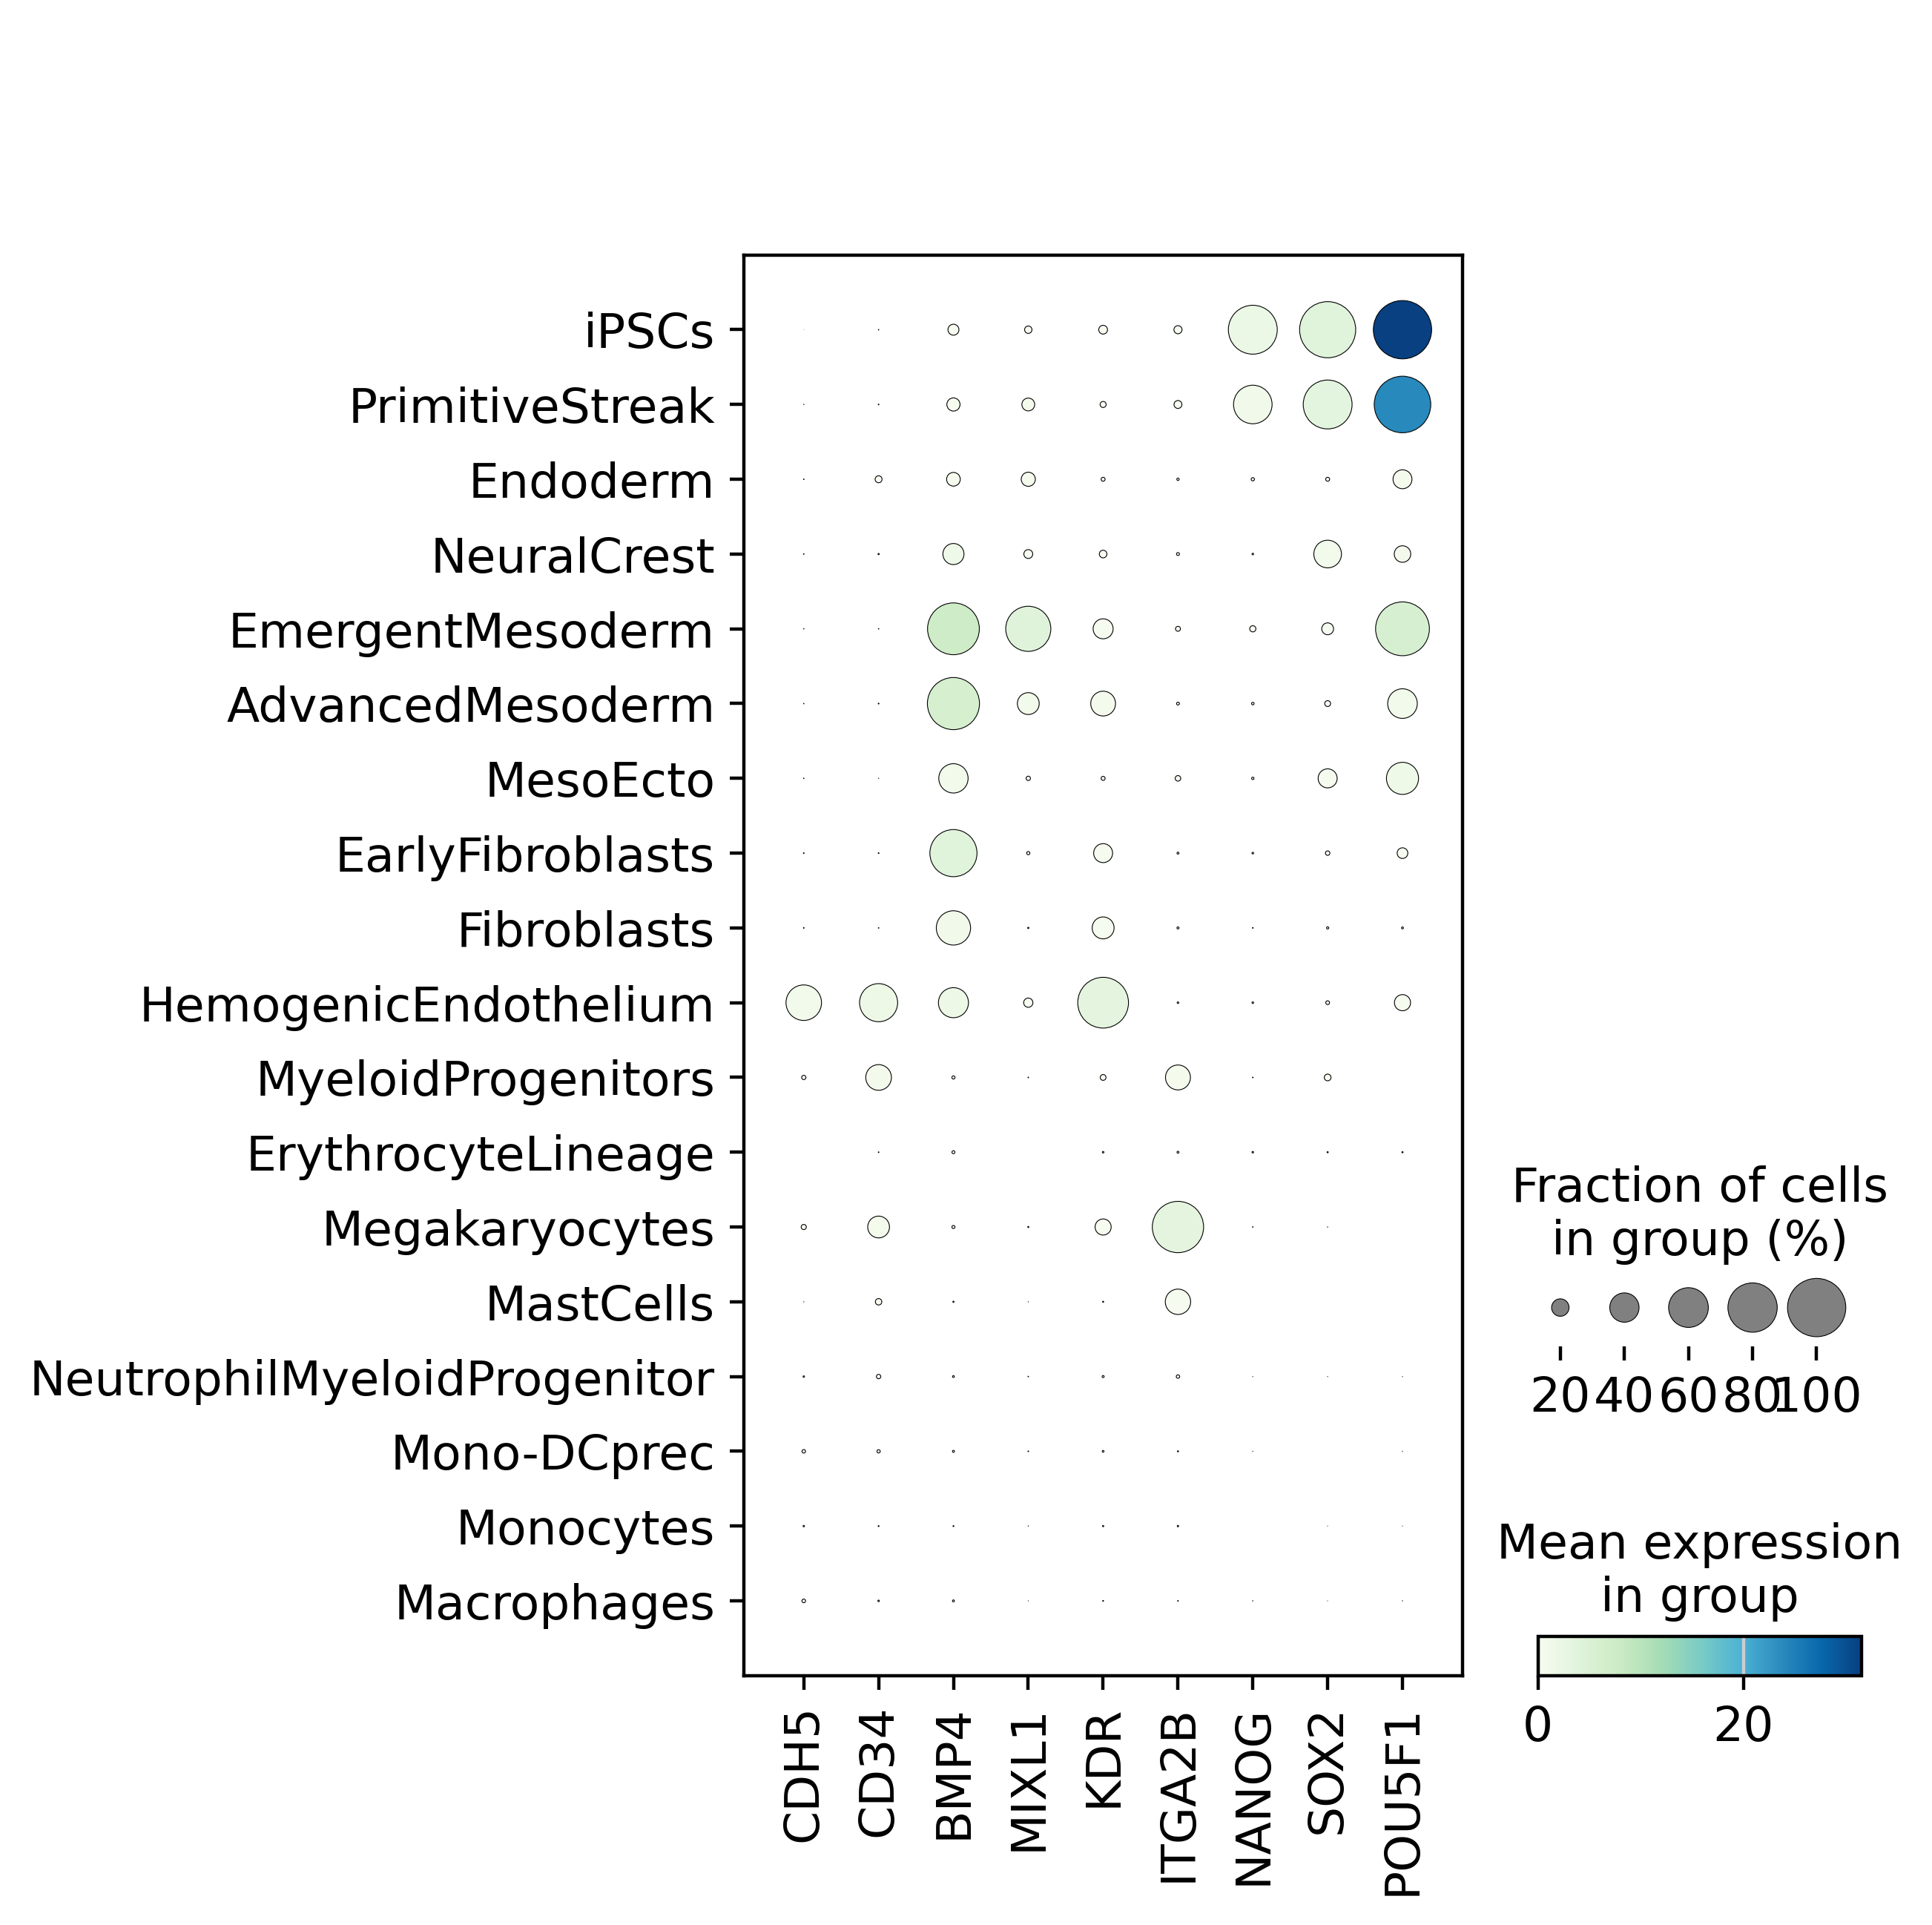

In [11]:
sc.pl.dotplot(adata, groupby='CellTypeLR', var_names=['CDH5','CD34','BMP4','MIXL1','KDR','ITGA2B','NANOG','SOX2','POU5F1'], cmap='GnBu')

## CellTypist requires log1p normalized expression to 10000 counts per cell

In [12]:
adata.X.min()

0.0

In [13]:
adata.X.max()

5406.0

In [14]:
adata.X.expm1().sum(axis = 1)

matrix([[1.39370958e+065],
        [1.72154268e+061],
        [2.89597699e+033],
        ...,
        [2.40765124e+003],
        [2.72790232e+076],
        [4.19885754e+296]])

In [15]:
adata.X = adata.raw.X

AttributeError: 'NoneType' object has no attribute 'X'

In [16]:
adata.X.min()

0.0

In [17]:
adata.X.max()

5406.0

In [18]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) 

In [19]:
sc.pp.log1p(adata)

In [20]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

## CellTypist model training

In [ ]:
# The `cell.labels` in `adata` will be used as cell type labels for training.
new_model = celltypist.train(adata, labels = 'CellTypeLR', n_jobs = 10, feature_selection = True)

🍳 Preparing data before training
✂️ 5043 non-expressed genes are filtered out
🔬 Input data has 135767 cells and 28495 genes
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
⚠️ Warning: it may take a long time to train this dataset with 135767 cells and 28495 genes, try to downsample cells and/or restrict genes to a subset (e.g., hvgs)


In [ ]:
# Save model file

new_model.write('/ssu/gassu/shared/CDC_lab/model_Alsinet.pkl')